# Introduction to Seaborn

I have referred to [this tutorial](https://elitedatascience.com/python-seaborn-tutorial) and Seaborn's [API reference](http://seaborn.pydata.org/api.html). Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library. Seaborn is a complement, not a substitute, for Matplotlib.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Pokemon.csv', index_col=0, encoding = "ISO-8859-1")
print(df.shape)
df.head()

(151, 12)


,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


# Seaborn's plotting functions

## Scatter plot
Seaborn doesn't have a dedicated scatter plot function. We will use Seaborn's function `lmplot` for fitting and plotting a regression line. [Documentation](http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot) for `lmplot`.

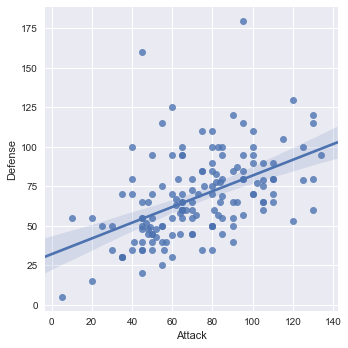

In [5]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
 
# Alternative way
# sns.lmplot(x=df.Attack, y=df.Defense)

### Color coding

We can tweak the output of `lmplot` as follows:

- Set `fit_reg=False` to remove the regression line.
- Set `hue='Stage'` to color points by the Pokémon's evolution stage.
- We can also set the `col` or the `row` parameters to add facets to the plot depending on some categorical variable.

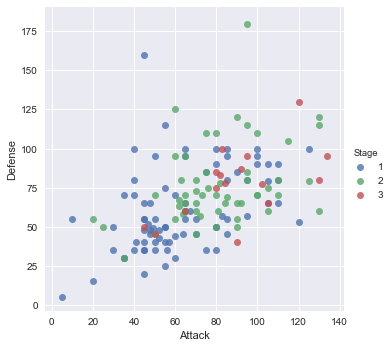

In [6]:
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

### Changing themes

Default theme is `darkgrid`. We can change it as follows.

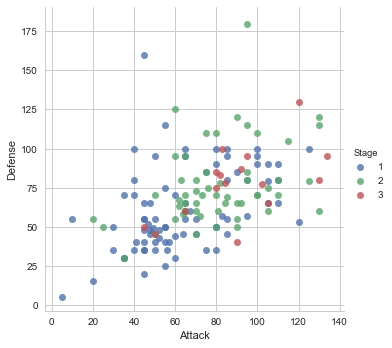

In [7]:
sns.set_style('whitegrid')
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

### Facet plot

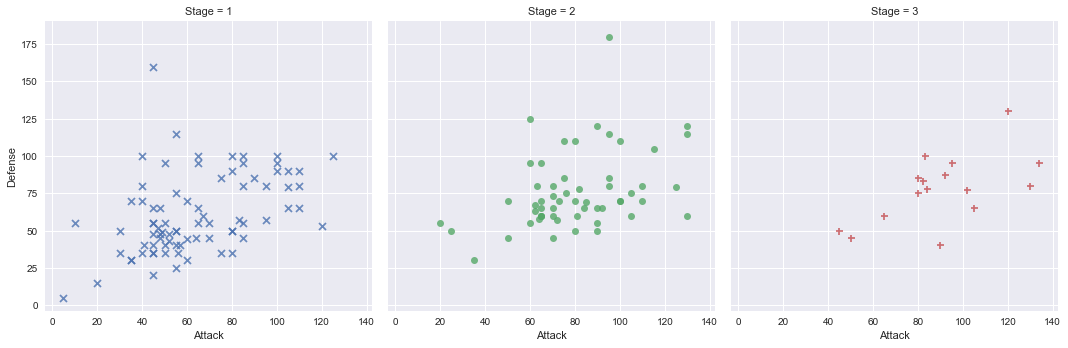

In [8]:
sns.set_style('darkgrid')
# Scatterplot arguments
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage',   # Color by evolution stage
           col = 'Stage', # plot each category in different columns
          markers = ['x','o','+']) # use a different marker for each level of hue

### Fixing the axes using matplotlib

Seaborn will get you most of the way there, but you'll sometimes need to bring in Matplotlib.

(0, 142.25647612435475)

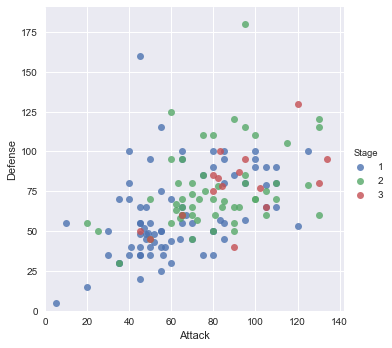

In [9]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

## Boxplot

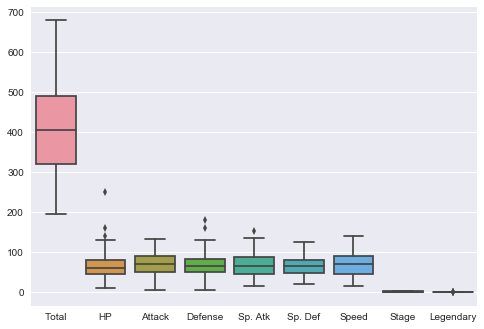

In [10]:
# Box plot of all columns in a data frame
sns.boxplot(data=df)

### Dropping some columns from boxplot

We will need to redefine the data frame before plotting the boxplot.

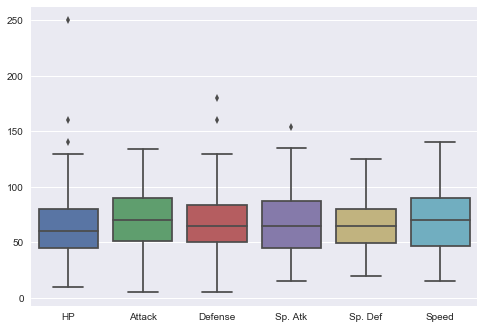

In [11]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)

### Boxplot grouped by a categorical variable

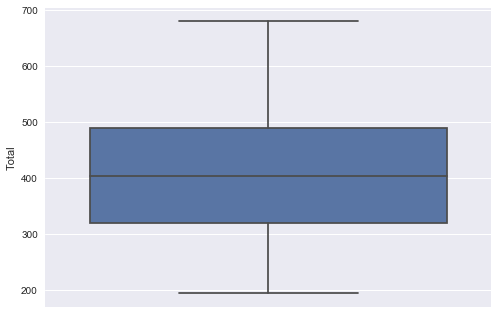

In [12]:
sns.boxplot(y = "Total", data=df)

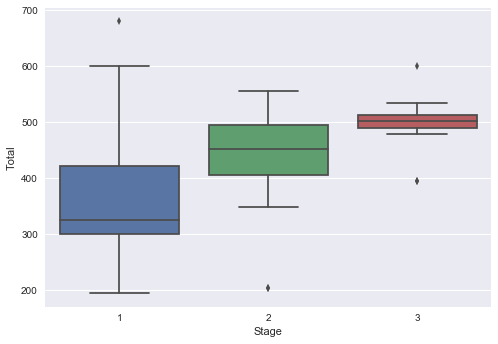

In [13]:
sns.boxplot(y = "Total", x = "Stage", data=df)

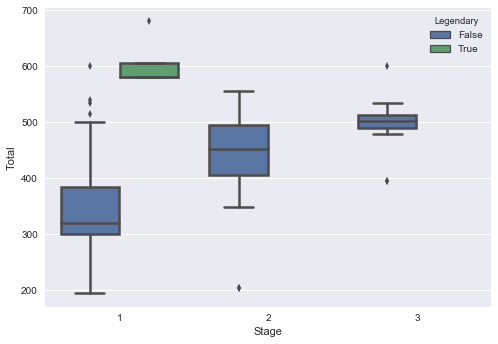

In [14]:
sns.boxplot(y = "Total", x = "Stage", data=df, hue = "Legendary", linewidth = 2.5)

### Adding points on top of boxplot

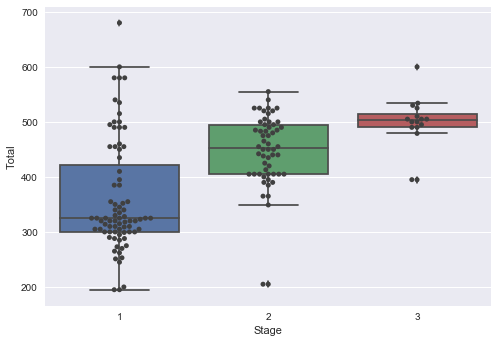

In [15]:
sns.boxplot(x = "Stage", y = "Total", data=df)
sns.swarmplot(x = "Stage", y = "Total", data=df, color=".25")

## Violin Plots


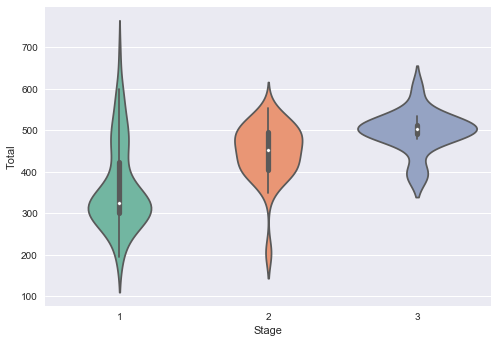

In [16]:
sns.violinplot(y = "Total", x = "Stage", data=df, palette = "Set2")

### Split distributions to compare accross hue

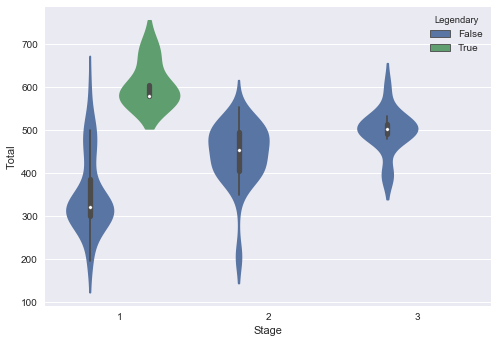

In [17]:
sns.violinplot(y = "Total", x = "Stage", data=df, hue = "Legendary")

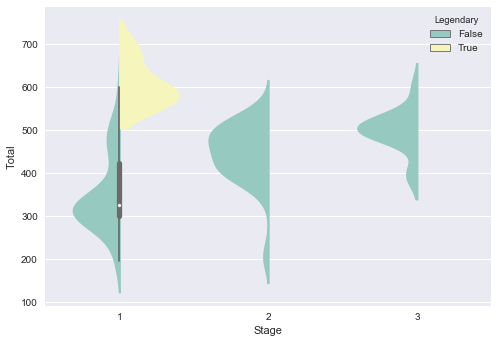

In [18]:
sns.violinplot(y = "Total", x = "Stage", data=df, hue = "Legendary", split = True, palette = "Set3")

### Points inside the violin plot

Default method to represent points inside violin plots is a boxplot.

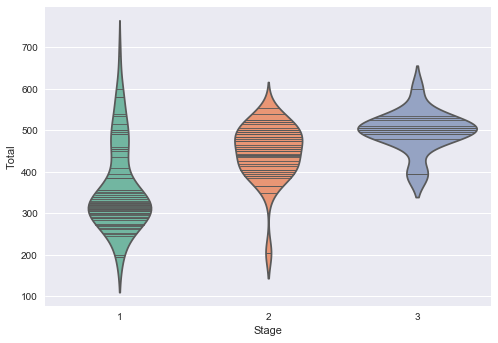

In [19]:
sns.violinplot(y = "Total", x = "Stage", data=df, palette = "Set2", inner = "stick")

### Overlaying a swarmplot

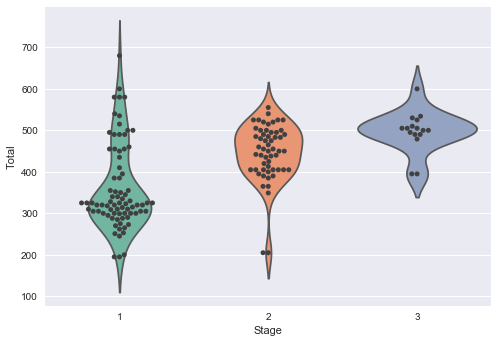

In [20]:
sns.violinplot(y = "Total", x = "Stage", data=df, palette = "Set2", inner = None)
sns.swarmplot(y = "Total", x = "Stage", data=df, color = ".25")

## Histograms

### Histogram overlayed with density

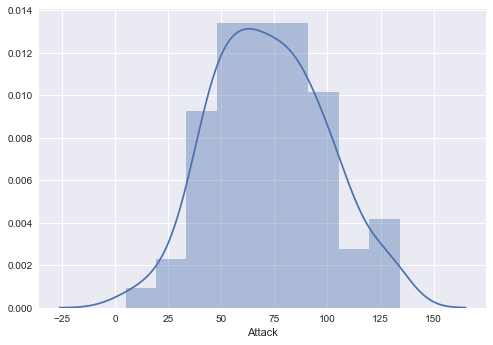

In [43]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

### Only density with rugplot

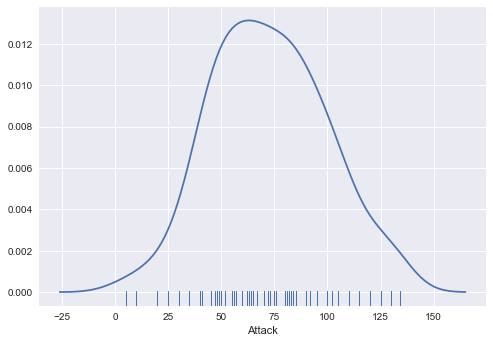

In [44]:
sns.distplot(df.Attack, hist = False, rug = True)

### Fitting a normal distribution

`kde` is the kernel density estimate for the histogram. Its default value is true. We can set it to `False` to  not show it. But we wish to compare it with the normal distribution below so we plot it. The black line is the normal curve with the same mean and standard deviation as the data.

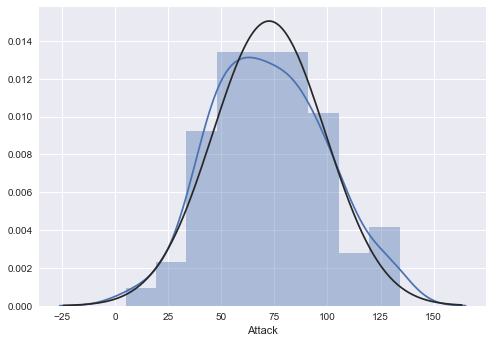

In [49]:
from scipy.stats import norm
sns.distplot(df.Attack, fit = norm, kde = True)

## Heatmaps

### Heat map of correlation

Plotting a heat map of absolute correlation values between the columns of a data frame.

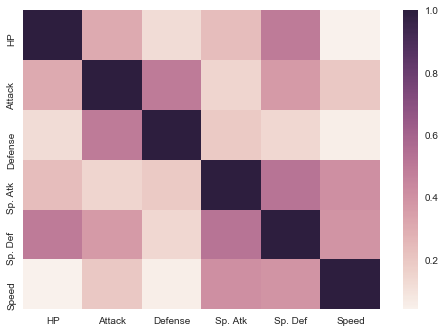

In [32]:
# Calculate absolute correlations
corr = abs(stats_df.corr())

# Heatmap of absolute correlation values
sns.heatmap(corr)

### Annotatin the heatmap with the correlation values

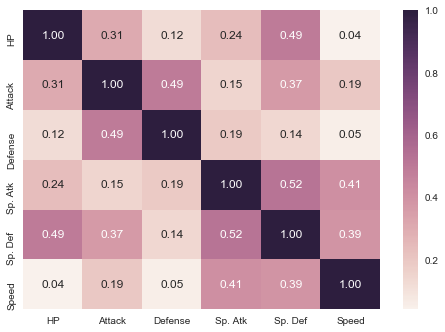

In [42]:
# fmt specifies format which is 2 decimal places here
sns.heatmap(corr, annot = True, fmt = '.2f')

## Pair or Grid Plots

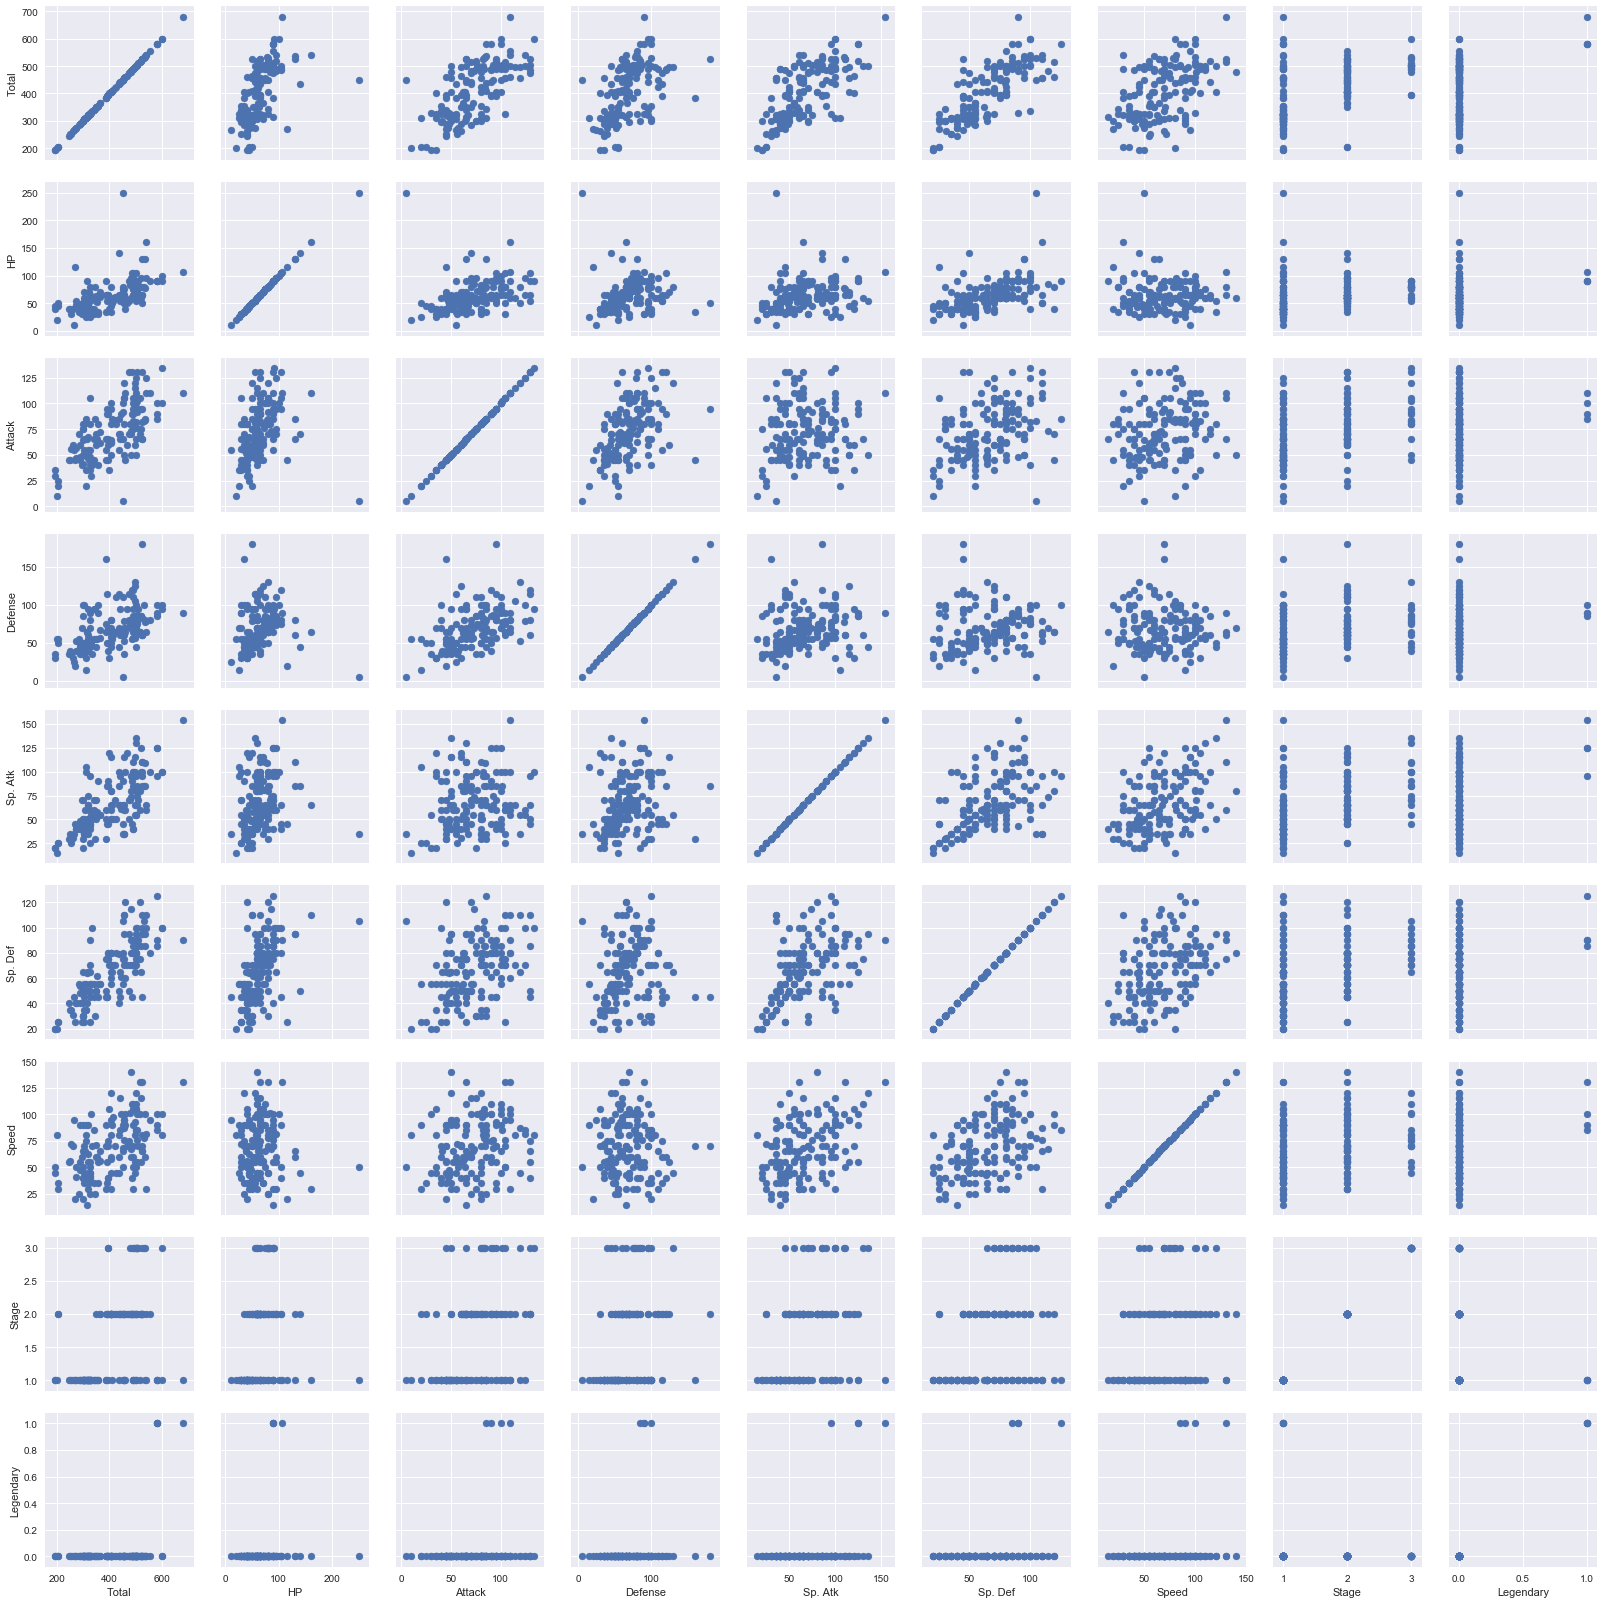

In [57]:
g = sns.PairGrid(df)
g = g.map(plt.scatter)

### Displaying histograms on diagonals

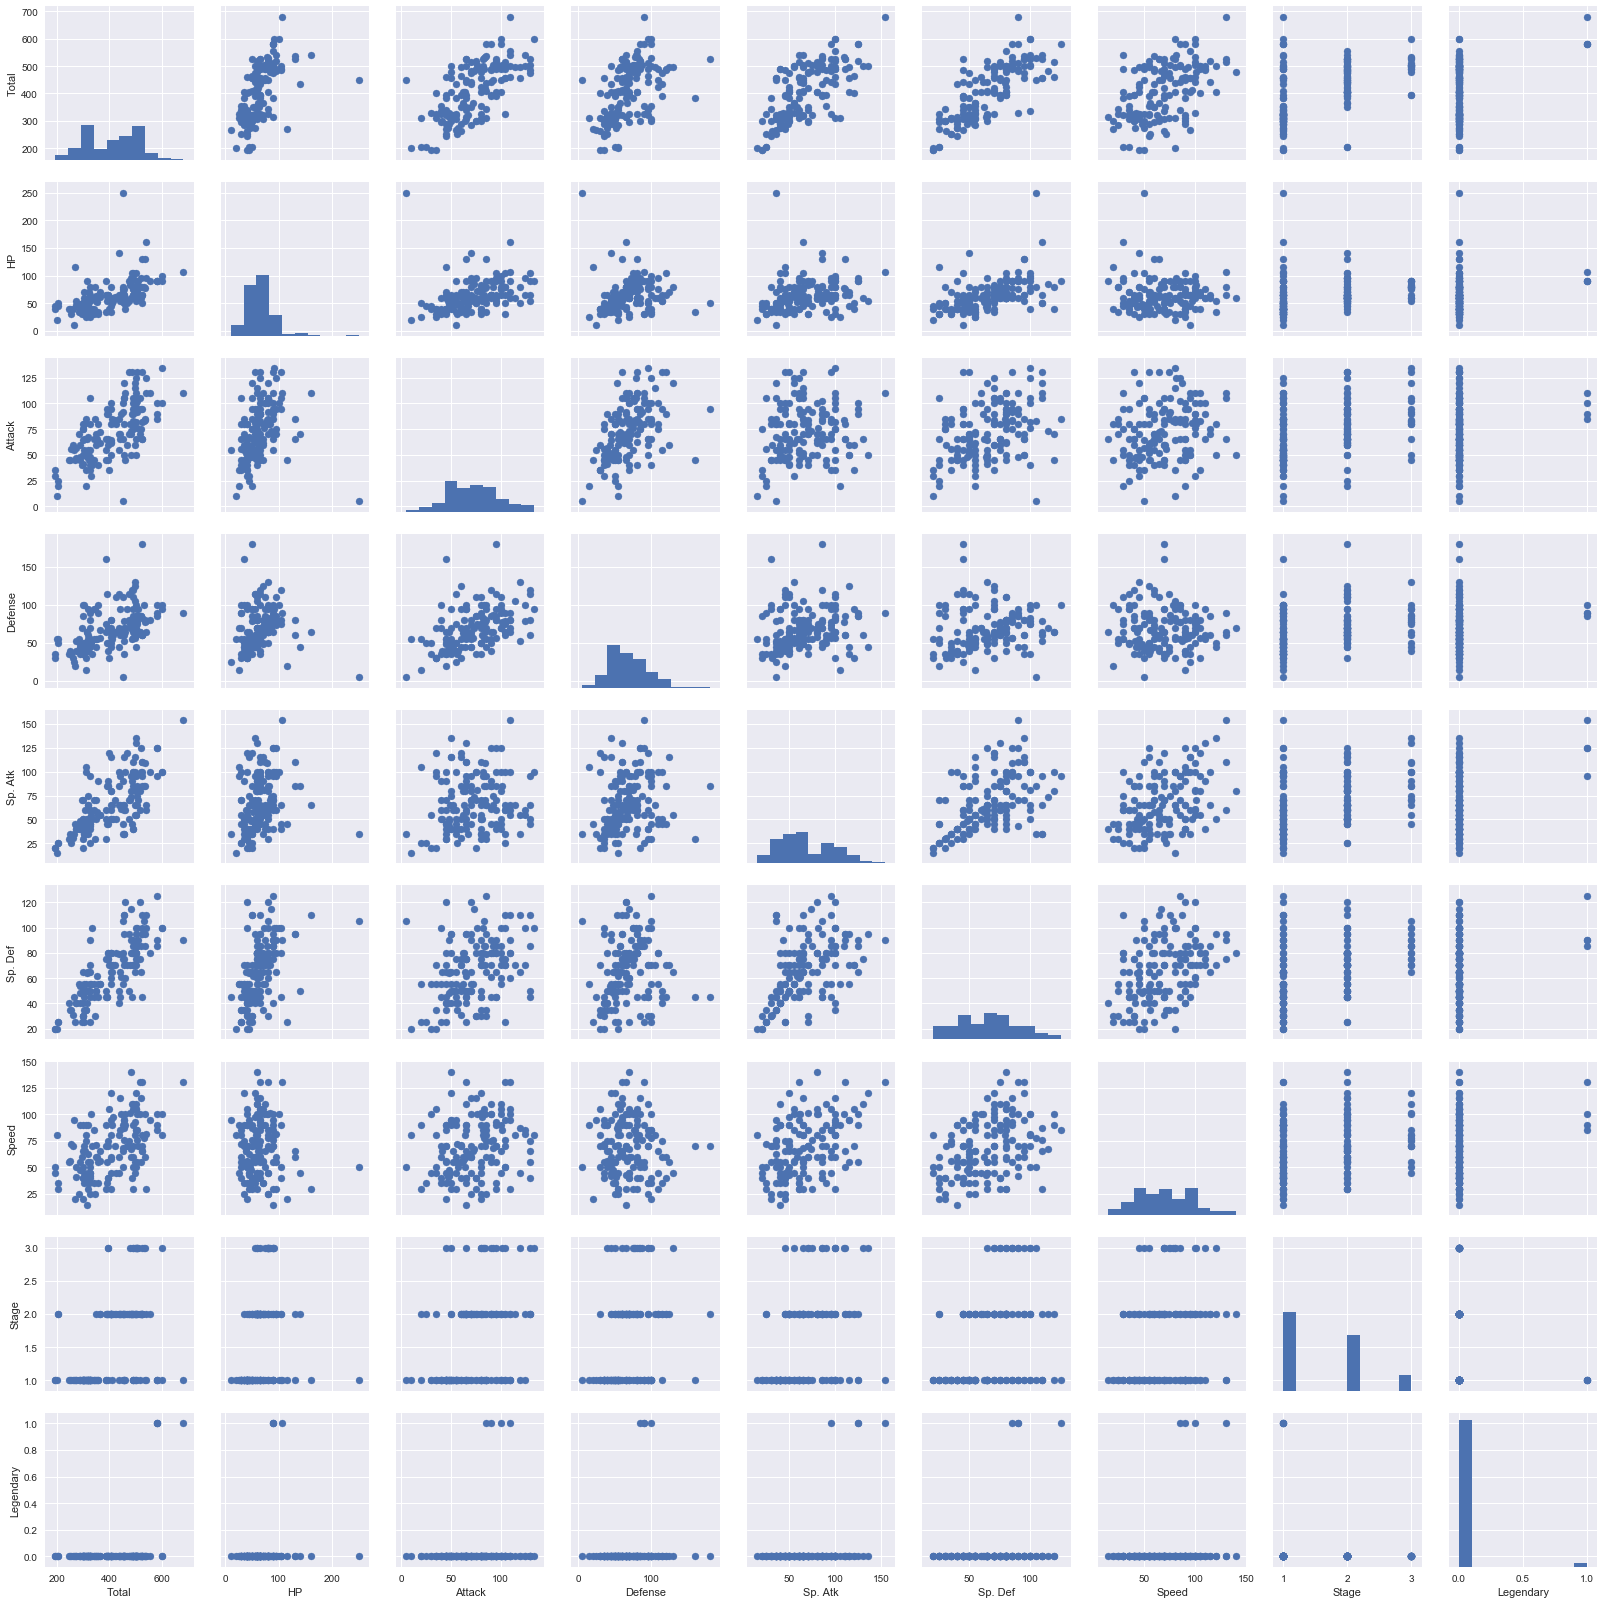

In [59]:
g = sns.PairGrid(df)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

### Adding categorical variables as hue

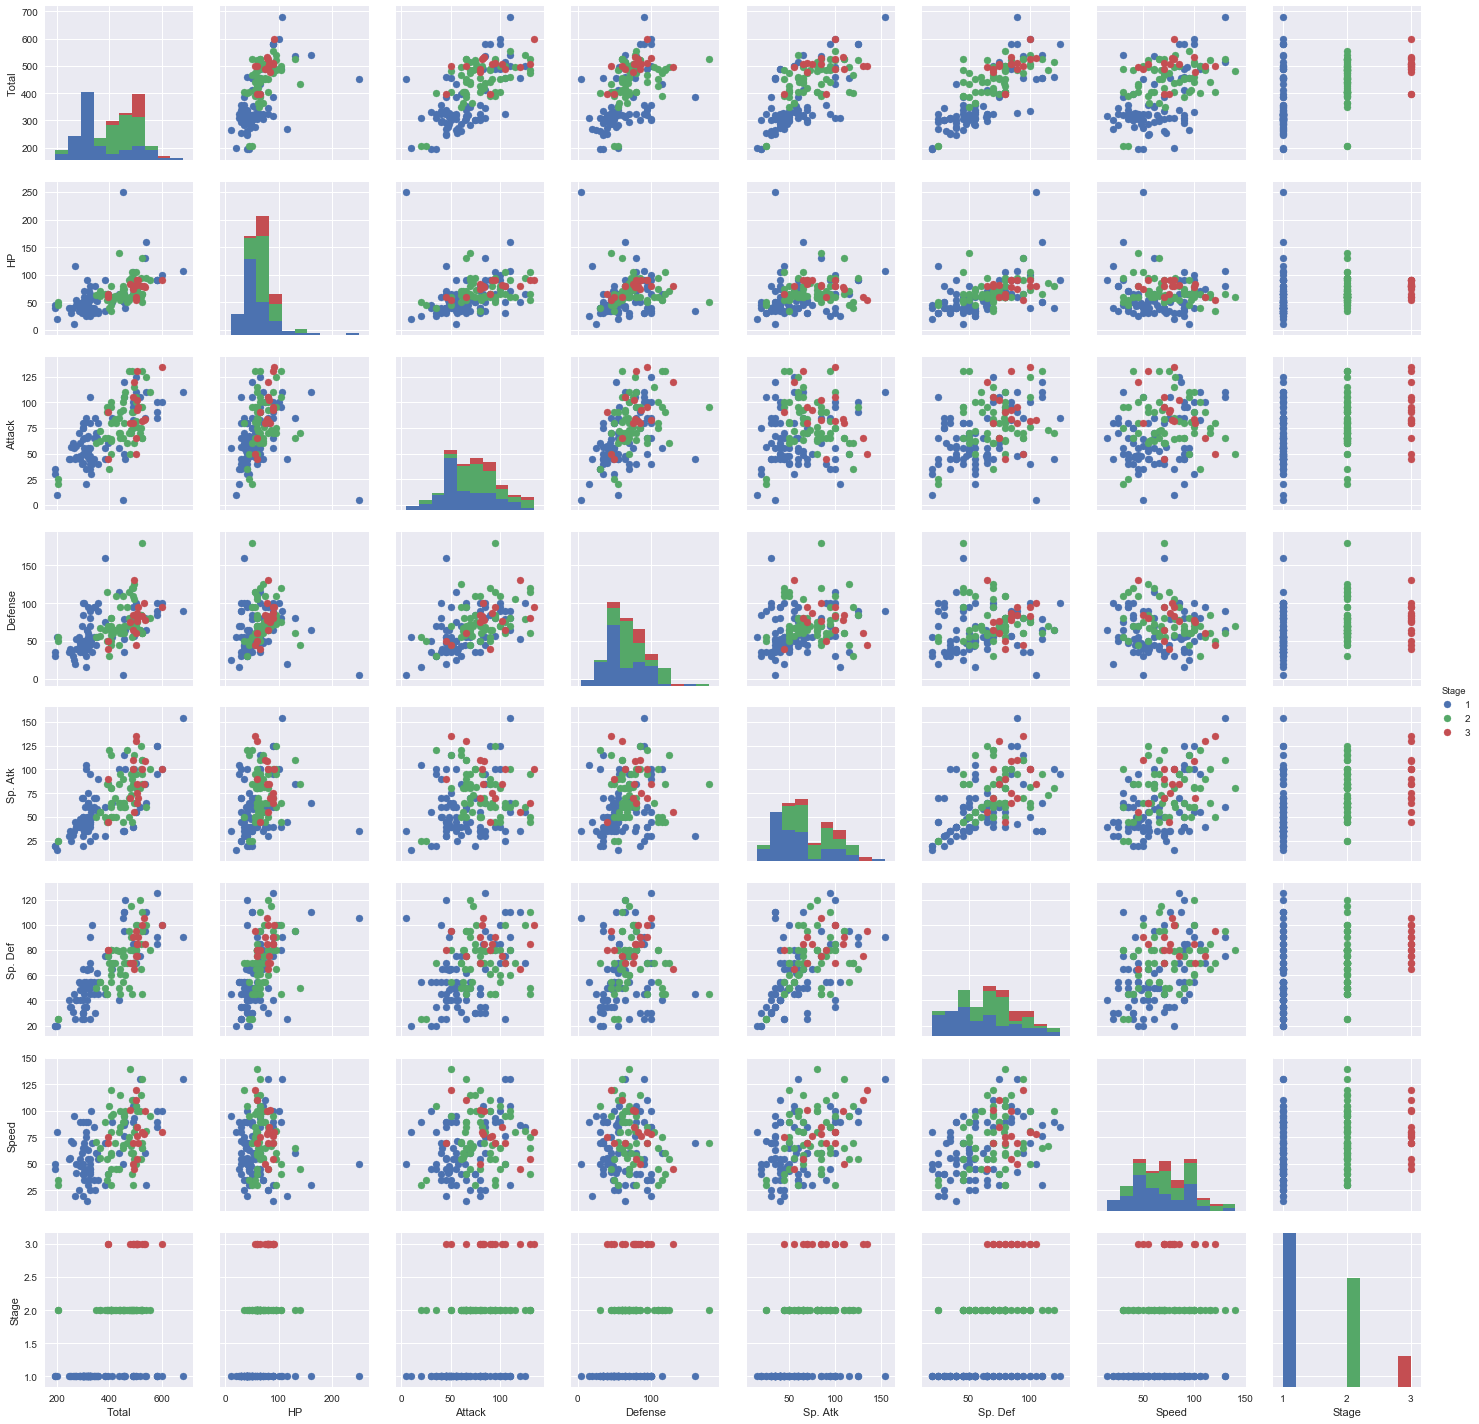

In [65]:
g = sns.PairGrid(df.drop(["Legendary"], axis = 1), hue="Stage")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

### Different functions in the upper and lower triangle

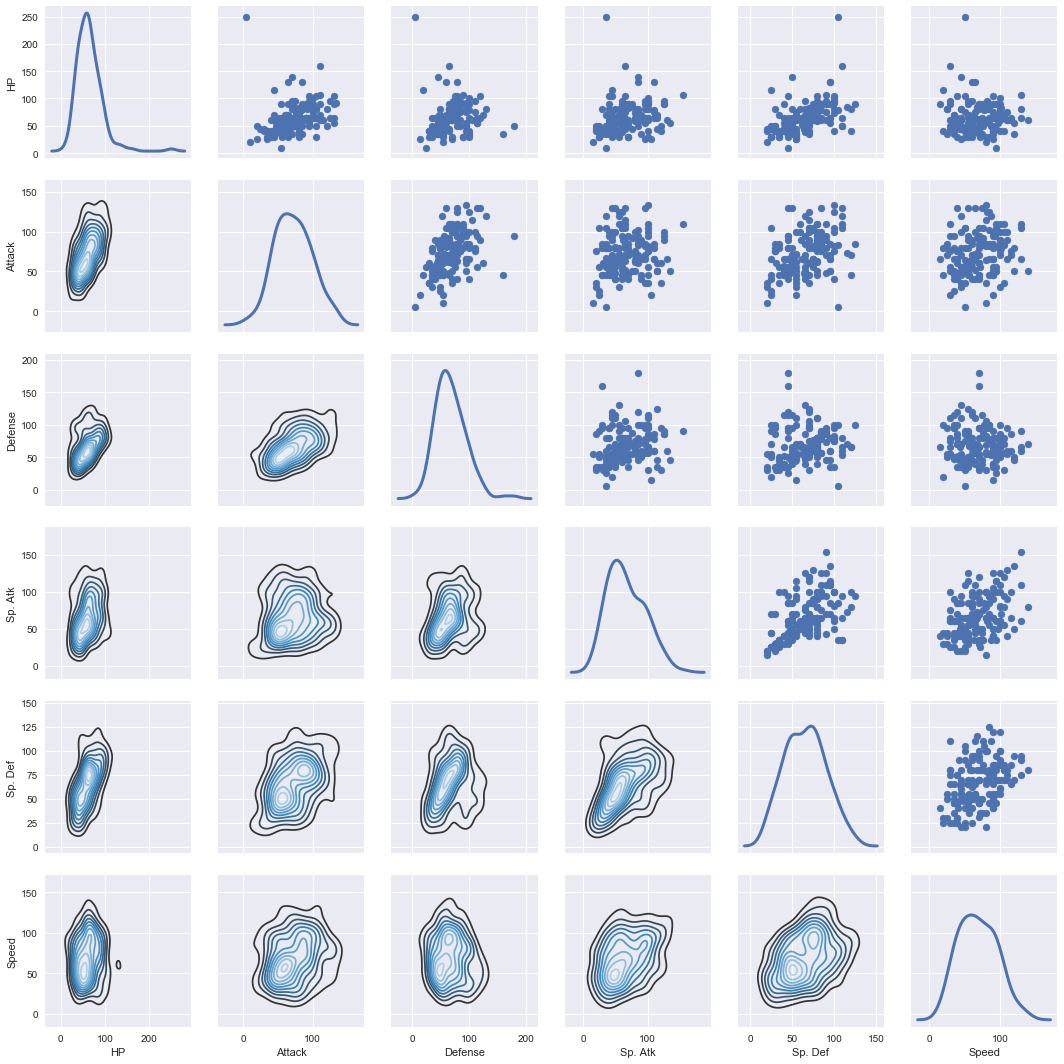

In [66]:
g = sns.PairGrid(stats_df)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)

## Factor Plots

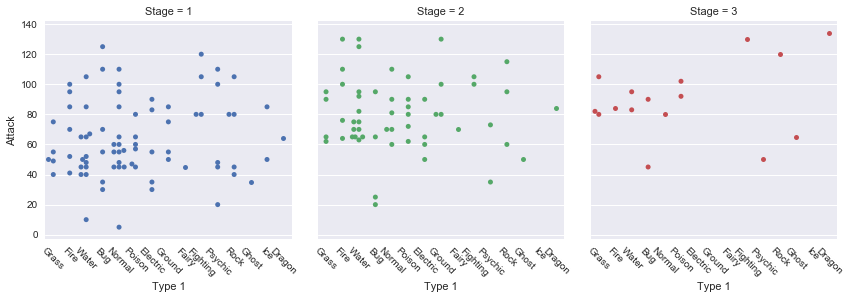

In [52]:
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)